In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

In [104]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/extended_salary_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
df = pd.read_csv(file_path)

In [106]:
df.head()

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  50 non-null     float64
 1   Salary           50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [108]:
df.shape

(50, 2)

In [109]:
df.describe()

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


In [110]:
variance = pow(df.std(),2)
round(variance, 1)

,0
YearsExperience,30.1
Salary,800829123.3


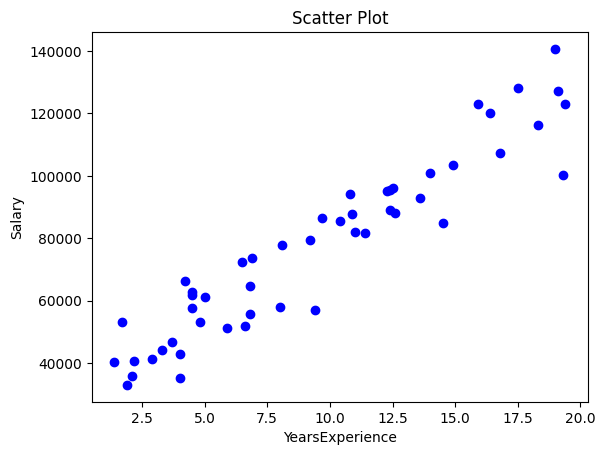

In [111]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')

plt.title("Scatter Plot")
plt.ylabel("Salary")
plt.xlabel("YearsExperience")
plt.show()

# **Build a Linear Regression model**

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [113]:
X = df[['YearsExperience']]
y = df['Salary']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

In [116]:
print(f"LinearRegression Slope: {slope}")
print(f"LinearRegression Intercept: {intercept}")

LinearRegression Slope: 4854.184972065953
LinearRegression Intercept: 31387.443404060636


# **Evaluate the model**

In [117]:
y_pred = model.predict(X_test)

In [118]:
# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

# Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 6836.210895894568
Mean Squared Error (MSE): 79580620.27310547


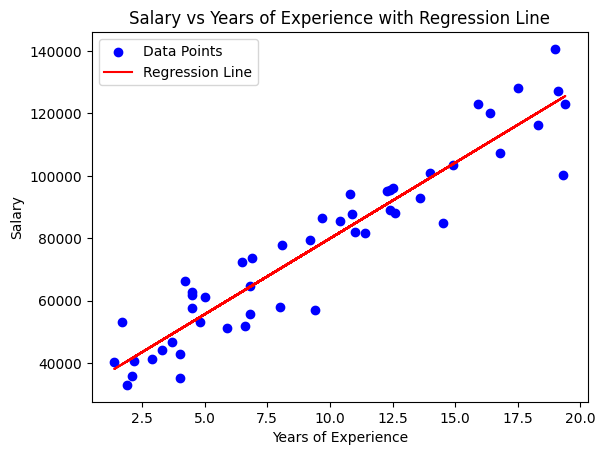

In [119]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Data Points')
plt.plot(df['YearsExperience'], model.predict(df[['YearsExperience']]), color='red', label='Regression Line')
plt.title("Salary vs Years of Experience with Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# **Bonus Task**

In [120]:
# Making loosly correlated by adding randoms
df['NumProjectsCompleted'] = df['YearsExperience'] * 2 + np.random.randint(1, 6, size=len(df))

In [121]:
df.head()

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,17.2
1,19.1,127213.68,41.2
2,14.9,103343.52,31.8
3,12.4,88988.96,25.8
4,4.0,35214.78,12.0


In [125]:
X = df[['YearsExperience', 'NumProjectsCompleted']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bonus = LinearRegression()
bonus.fit(X_train, y_train)

y_pred_bonus = bonus.predict(X_test)

slope_bonus = bonus.coef_
intercept_bonus = bonus.intercept_

print(f"New Linear Regression Slope: {slope_bonus}")
print(f"New Linear Regression Intercept: {intercept_bonus}")

New Linear Regression Slope: [ 7105.74910897 -1105.69678287]
New Linear Regression Intercept: 34044.78188155307


In [128]:
new_mae = mean_absolute_error(y_test, y_pred_bonus)
new_mse = mean_squared_error(y_test, y_pred_bonus)

print(f"Multiple Linear Regression (MAE): {new_mae}")
print(f"Multiple Linear Regression (MSE): {new_mse}")

Multiple Linear Regression (MAE): 5902.916037818168
Multiple Linear Regression (MSE): 77212679.6684384


In [130]:
print("Comparison of Model Performance:")
print(f"Single Input Linear Regression - MAE: {mae}, MSE: {mse}")
print(f"Multiple Input Linear Regression - MAE: {new_mae}, MSE: {new_mse}")

Comparison of Model Performance:
Single Input Linear Regression - MAE: 6836.210895894568, MSE: 79580620.27310547
Multiple Input Linear Regression - MAE: 5902.916037818168, MSE: 77212679.6684384
